# K-Nearest Neighbors (KNN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## KNN Classifier Manual

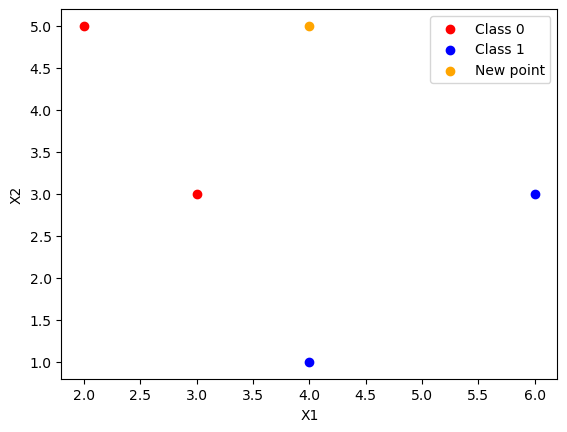

In [2]:
X = np.array([[2, 5], [3, 3], [4, 1], [6, 3]])
y = np.array([0, 0, 1, 1])

x_new = np.array([4, 5])

plt.scatter(X[y == 0, 0], X[y == 0, 1], c="r", label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="b", label="Class 1")
plt.scatter(x_new[0], x_new[1], c="orange", label="New point")

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.show()

$ d(p, q) = \sqrt{\sum_{i = 1}^n (q_i - p_i)^2} $

In [3]:
def euclidean_distance(p, q):
  return np.sqrt(np.sum((q - p)**2))

In [4]:
distances = np.array([euclidean_distance(p, x_new) for p in X])
distances

array([2.        , 2.23606798, 4.        , 2.82842712])

Predicted value is determined by the majority class (mode) among the k nearest neighbors in feature space.

In [5]:
k = 3
k_indices = np.argsort(distances)[:k]
neighbors = y[k_indices]
neighbors

array([0, 0, 1])

In [6]:
y_pred = np.bincount(neighbors).argmax()
y_pred

np.int64(0)

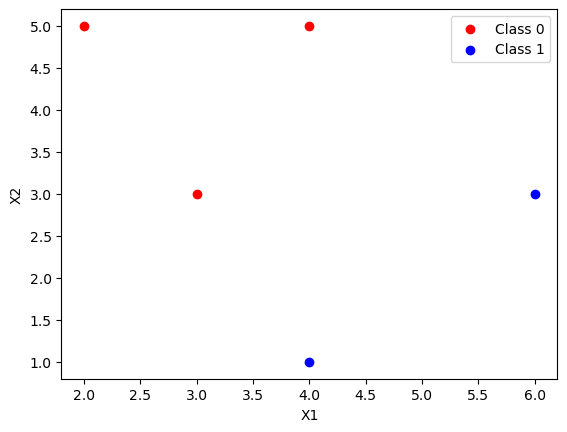

In [7]:
plt.scatter(x_new[0], x_new[1], c="r")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="r", label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="b", label="Class 1")

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.show()

## KNN Classifier from Scikit-learn

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [9]:
data = load_iris()
X = data.data[:, 2:]  # Petal Length and Petal Width
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

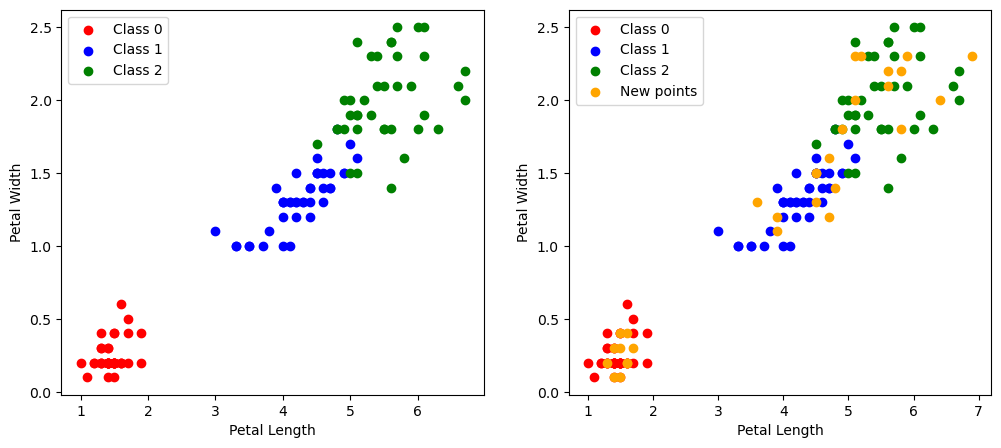

In [10]:
num_classes = 3
colors = ["r", "b", "g"]

# First subplot
plt.figure(figsize=(12, 5))
plt.subplot(121)
for i in range(num_classes):
  plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=colors[i], label=f"Class {i}")

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

# Second subplot
plt.subplot(122)
for i in range(num_classes):
  plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=colors[i], label=f"Class {i}")

plt.scatter(X_test[:, 0], X_test[:, 1], c="orange", label="New points")

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

plt.show()

In [11]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

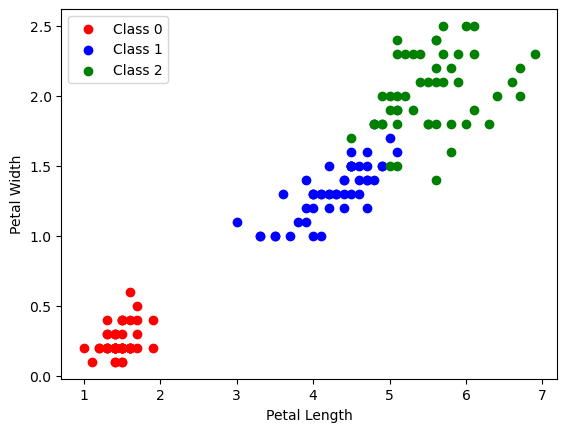

In [12]:
num_classes = 3
colors = ["r", "b", "g"]

for i in range(num_classes):
  plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=colors[i], label=f"Class {i}")
  plt.scatter(X_test[y_pred == i, 0], X_test[y_pred == i, 1], c=colors[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

plt.show()

In [13]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.1f}%")

MSE: 0.0
Accuracy: 100.0%


## KNN Regression

In [14]:
from seaborn import load_dataset
from sklearn.neighbors import KNeighborsRegressor

In [15]:
data = load_dataset("mpg").dropna()
X = data[["horsepower", "weight"]]
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Unlike classification, KNN regression predicts the output by computing the average value of all k nearest neighbors.

In [16]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

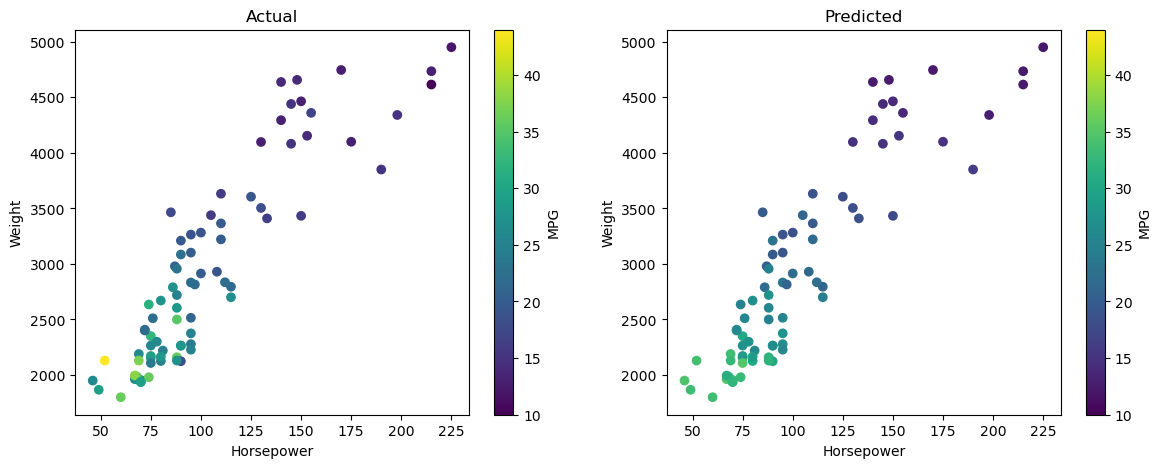

In [17]:
vmin = min(y_test.min(), y_pred.min())
vmax = max(y_test.max(), y_pred.max())

plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.scatter(X_test["horsepower"], X_test["weight"], c=y_test, vmin=vmin, vmax=vmax, cmap='viridis')
plt.colorbar(label="MPG")
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.title("Actual")

plt.subplot(122)
plt.scatter(X_test["horsepower"], X_test["weight"], c=y_pred, vmin=vmin, vmax=vmax, cmap='viridis')
plt.colorbar(label="MPG")
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.title("Predicted")

plt.show()

In [18]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 15.966263291139235
